In [1]:
from datetime import timedelta
import pandas

import swasputils

In [2]:
zoo_classifications = swasputils.ZooniverseClassifications()

C:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\anm83\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
SKIP_WORKFLOWS = {5214,17339}

In [4]:
workflow_counts = {}
for workflow_id, workflow_classifications in zoo_classifications.workflows.items():
    if workflow_id in SKIP_WORKFLOWS:
        continue
    classification_dates = workflow_classifications.df['created_at']
    if len(classification_dates.index) == 0:
        continue
    classification_dates = classification_dates.value_counts()
    classification_dates.index = pandas.to_datetime(classification_dates.index)
    classification_dates.name = workflow_id
    workflow_counts[workflow_id] = classification_dates.resample('1D').count()
workflow_counts = pandas.DataFrame(workflow_counts)

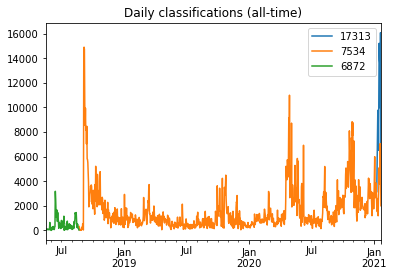

In [5]:
workflow_counts.dropna('columns', 'all').plot(
    title='Daily classifications (all-time)',
)

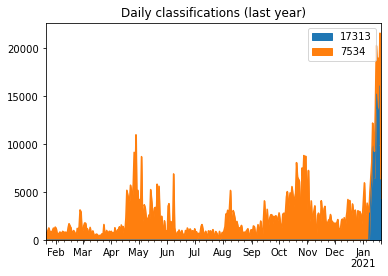

In [6]:
workflow_counts[
    workflow_counts.index >= (workflow_counts.index.max() - timedelta(days=365))
].dropna('columns', 'all').plot.area(
    title='Daily classifications (last year)',
)

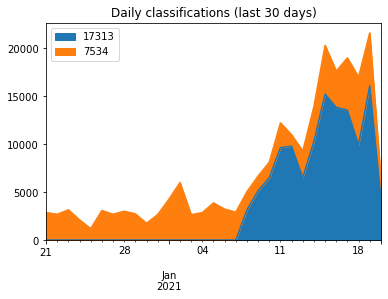

In [7]:
workflow_counts[
    workflow_counts.index >= (workflow_counts.index.max() - timedelta(days=30))
].dropna('columns', 'all').plot.area(
    title='Daily classifications (last 30 days)',
)